In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
#define constants
n = 64
s = 1
sigma2 = 1

#load data
train = np.loadtxt('hw6_q2_train.csv', delimiter=",", dtype=float)
test = np.loadtxt('hw6_q2_test.csv', delimiter=",", dtype=float)

In [103]:
#function that computes kernel
def kernel(x,xp,s):
    k = np.e**(-(1 / (2 * s**2)) * np.linalg.norm(x - xp))
    return k

#define a function to "fill" a matrix with kernel values to make life easier, only works for vector size of 1
def mkernel(x,xp,s):
    dimx = np.size(x) // 1
    dimxp = np.size(xp) // 1
                    
    k = np.zeros((dimx, dimxp))
    
    for i in range(dimx):
        for j in range(dimxp):
            k[i,j] = kernel(x[i],xp[j],s)
    return k

#function that computes kernels for GPR
def gpr(x_train, x_test, y_train, s, sigma_2):
    mean = mkernel(x_train, x_test, s).T @ np.linalg.inv(mkernel(x_train,x_train,s) 
                                                         + sigma_2 * np.eye(len(x_train))) @ (y_train - 0)
    covariance = mkernel(x_test, x_test, s) - mkernel(x_train, x_test, s).T @ np.linalg.inv(mkernel(x_train, x_train, s) 
                                                                                            + sigma_2 * np.eye(len(x_train))) @ mkernel(x_train, x_test, s)
    return mean, covariance

In [106]:
#split training data into x and y 
x_train = train[:,0]
y_train = train[:,1]

#compute predictions
x_values = np.linspace(-5,5,100)
mean, covariance = gpr(x_train, x_values, y_train, s, sigma2)


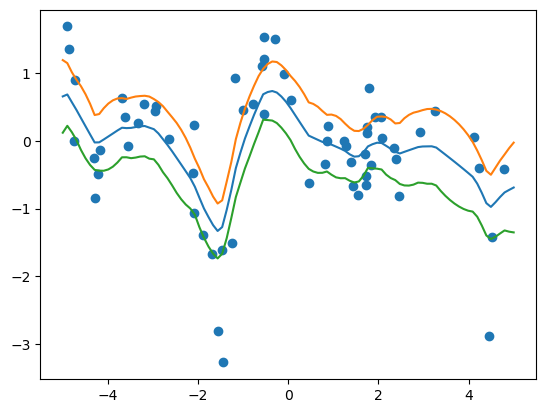

In [107]:
plt.scatter(x_train, y_train) 
plt.plot(x_values, mean)
plt.plot(x_values, mean + np.sqrt(np.diag(covariance)))
plt.plot(x_values, mean - np.sqrt(np.diag(covariance)))

In [131]:
def NLL(x, y, s, sigma2):
    n = np.size(x)
    x1v, x2v = np.meshgrid(x, x)
    xt = np.reshape(np.array([x1v,x2v]), (2, n**2)).T
    
    C = mkernel(xt[:,0], xt[:,1], s)
    lp = (1 / 2) * y.T @ np.linalg.inv(C) @ y + np.log(np.det(C)) + n * np.log(2 * np.pi())
    
    return lp

In [109]:
burger, burger2 = np.meshgrid(x_values, x_values)

In [132]:
NLL(x_train,y_train, s, sigma2)

LinAlgError: Singular matrix